# Analyse des Datensets "Most Streamed Spotify Songs 2023"

## Zusammenfassung des Datensatzes:

<p style="font-size:18px; font-family:Arial; color:black;">

https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?resource=download

Das Datenset enthält verschiedene Informationen zu Songs, Künstlern und ihrer Präsenz auf verschiedenen Streaming-Plattformen sowie deren musikalische Eigenschaften. Hier sind einige der spannendsten Spalten:

- track_name: Name des Tracks
- artist(s)_name: Name der Künstler, die den Song performen
- artist_count: Anzahl der Künstler pro Track
- released_year: Veröffentlichungsjahr des Songs
- in_spotify_playlists: Anzahl der Spotify-Playlists, in denen der Song vorkommt
- streams: Gesamtanzahl der Streams auf Spotify
- bpm: Beats per Minute (Tempo des Songs)
- danceability_%: Tanzbarkeit des Songs in Prozent
- valence_%: Positivität der Stimmung des Songs in Prozent
- energy_%: Energieniveau des Songs in Prozent
- acousticness_%: Akustizität des Songs in Prozent
- instrumentalness_%: Instrumentalanteil des Songs in Prozent
- speechiness_%: Anteil der gesprochenen Wörter eines Songs
---
## Fragen die mit dieser Analyse beantwortet werden sollen:

1. Welche 10 Artists haben die höchste Anzahl an Songs?<br>
2. Wie verteilen sich die Songs nach ihren BPM-Werten? Welche Anzahl an BPM ist im Datensatz am häufigsten vertreten?<br>
3. Welche Songs haben die höchste Tanzbarkeit (Danceability) und welcher Tanzbarkeitsgrad tritt am häufigsten auf? Wie fällt die Tanzbarkeit unter den 10 meistgestreamten Artists aus? <br>
4. Wie unterscheiden sich der Anteil an gesprochenen Worten (Speechiness) zwischen älteren und neueren Songs?<br>
5. Was sind die 10 Songs mit der höchsten Positivität (Valence)?<br>
6. Wie korrelieren die Anzahl der Streams und den musikalischen Eigenschaften wie Speechiness etc. etc.?<br>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 24)


#spotify Theme erstellen
spotify_style = {
    'axes.facecolor': 'black',  
    'figure.facecolor': 'black', 
    'axes.edgecolor': 'white',   
    'grid.color': 'gray',        
    'xtick.color': 'white',      
    'ytick.color': 'white',      
    'text.color': 'white',       
    'axes.labelcolor': 'white',  
    'lines.color': '#1DB954',    
    'patch.edgecolor': 'white',  
    'axes.prop_cycle': plt.cycler('color', ['#1DB954']),  
    'grid.linestyle': '--'      
}

plt.rcParams.update(spotify_style)
sns.set(style=None, rc=spotify_style)

## Laden des Datensatzes

In [5]:
df = pd.read_csv('spotify_2023.csv', encoding='ISO-8859-1')
df.shape

(953, 24)

In [6]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [7]:
# Umbenennen von Spalten für einfacheren Zugriff
df = df.rename(columns={'artist(s)_name': 'artist', 'track_name': 'song'})

In [8]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## Bereinigung des Datensatzes

#### Löschen der überflüssigen Spalten

In [11]:
df = df[['song', 'artist', 
         'released_year',
      
     'streams',  'bpm',
        
    'danceability_%', 'valence_%', 
    'energy_%',
       'acousticness_%', 'instrumentalness_%', 
    'liveness_%',
         'speechiness_%'
   ]].copy()

#### Suche und Löschen von leeren Zellen

In [13]:
pd.isna(df).sum()

song                  0
artist                0
released_year         0
streams               0
bpm                   0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [14]:
df.dtypes

song                  object
artist                object
released_year          int64
streams               object
bpm                    int64
danceability_%         int64
valence_%              int64
energy_%               int64
acousticness_%         int64
instrumentalness_%     int64
liveness_%             int64
speechiness_%          int64
dtype: object

In [15]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.dropna(subset=['streams'], inplace=True)

In [16]:
df.dtypes

song                   object
artist                 object
released_year           int64
streams               float64
bpm                     int64
danceability_%          int64
valence_%               int64
energy_%                int64
acousticness_%          int64
instrumentalness_%      int64
liveness_%              int64
speechiness_%           int64
dtype: object

#### Überprüfen der Duplikate

In [18]:
df.loc[df.duplicated(subset='song')] 

,song,artist,released_year,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
417,Die For You,Joji,2022,246390068.0,148,47,15,52,38,13,29,5
466,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",1950,473248298.0,143,60,86,32,88,0,34,6
482,SPIT IN MY FACE!,ThxSoMch,2022,301869854.0,166,70,57,57,9,20,11,7
616,Take My Breath,The Weeknd,2021,432702334.0,121,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,2022,723894473.0,109,84,72,74,10,0,34,7
825,Flowers,Lauren Spencer Smith,2021,184826429.0,138,70,31,44,84,0,9,39
831,Daylight,Harry Styles,2022,290833204.0,146,69,63,45,48,0,18,4
852,Numb,"Marshmello, Khalid",2022,295307001.0,120,91,63,77,12,1,10,5
873,SNAP,Rosa Linn,2022,711366595.0,170,56,52,64,11,0,45,7
922,Miss You,Southstar,1982,154356956.0,145,66,24,58,17,0,19,5


In [19]:
duplicates = df[df.duplicated(subset=['song', 'artist'], keep=False)]
duplicates

,song,artist,released_year,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,2022,726307468.0,170,56,53,64,11,0,45,6
345,SPIT IN MY FACE!,ThxSoMch,2022,303216294.0,94,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,2022,723894473.0,109,84,72,74,10,0,34,7
482,SPIT IN MY FACE!,ThxSoMch,2022,301869854.0,166,70,57,57,9,20,11,7
512,Take My Breath,The Weeknd,2021,130655803.0,121,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,2021,432702334.0,121,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,2022,723894473.0,109,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,2022,711366595.0,170,56,52,64,11,0,45,7


In [20]:
df_cleaned = df.drop_duplicates(subset=['song', 'artist'], keep='first')
df_cleaned = df

## Datenanalyse und -visualisierung

### 1. Welche 10 Artists haben die höchste Anzahl an Songs im Datensatz?

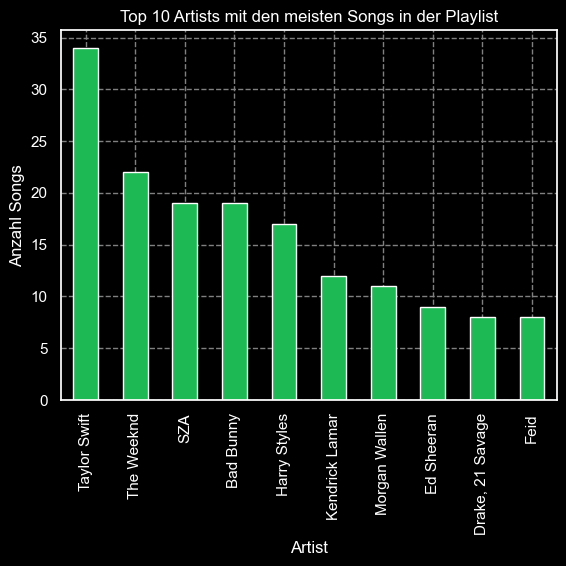

In [23]:
#Gruppierung nach Künstler, um die Anzahl der Songs pro Künstler zu zählen
top_artists_song = df.groupby("artist").count().sort_values(by="song", ascending=False)['song'][:10] 
top_artists_song.plot(kind='bar', title='Top 10 Artists mit den meisten Songs in der Playlist', xlabel='Artist', ylabel='Anzahl Songs')
plt.show()

### 2. Wie verteilen sich die Songs nach ihren BPM-Werten? Welche Anzahl an BPM ist im Datensatz am häufigsten vertreten?

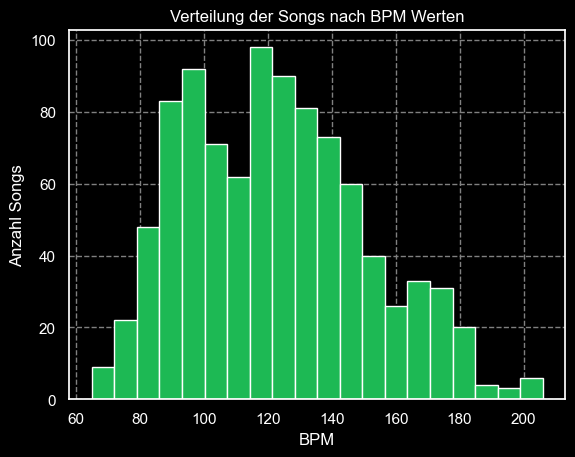

In [25]:
bpm_hist = df['bpm'].plot(kind='hist', bins=20, title='Verteilung der Songs nach BPM Werten')
plt.xlabel('BPM')
plt.ylabel('Anzahl Songs')
plt.show()

### 3. Welche Songs haben die höchste Tanzbarkeit (Danceability) und welcher Tanzbarkeitsgrad tritt am häufigsten auf? Wie fällt die Tanzbarkeit unter den 10 meistgestreamten Artists aus?

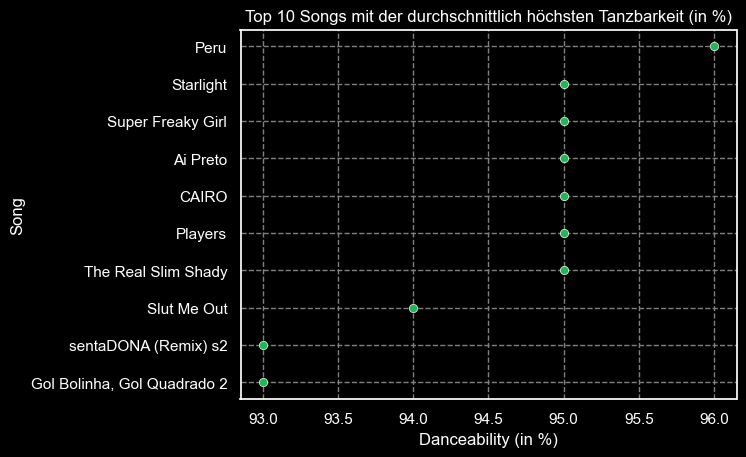

In [27]:
top_song_danceability = df.groupby("song").mean('danceability_%').sort_values(by='danceability_%', ascending=False).head(10)
sns.scatterplot(x='danceability_%', y='song', data=top_song_danceability)
plt.title('Top 10 Songs mit der durchschnittlich höchsten Tanzbarkeit (in %)')
plt.xlabel('Danceability (in %)')
plt.ylabel('Song')
plt.show()

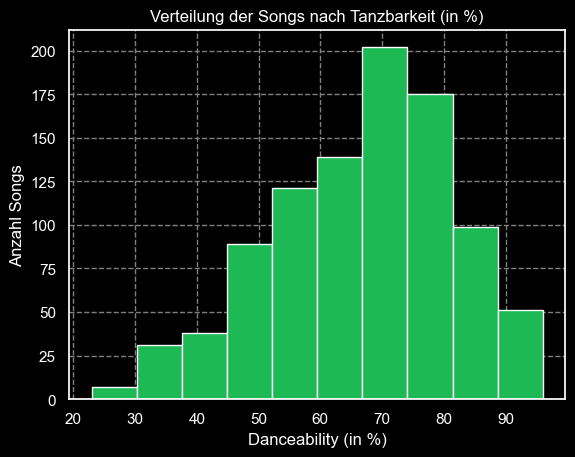

In [28]:
danceability_hist = df['danceability_%'].plot(kind='hist', bins=10, title='Verteilung der Songs nach Tanzbarkeit (in %)')
plt.xlabel('Danceability (in %)')
plt.ylabel('Anzahl Songs')
plt.show()

#### 3. Unterfrage: Welche 10 Artists haben die höchste Anzahl an Streams im Datensatz?

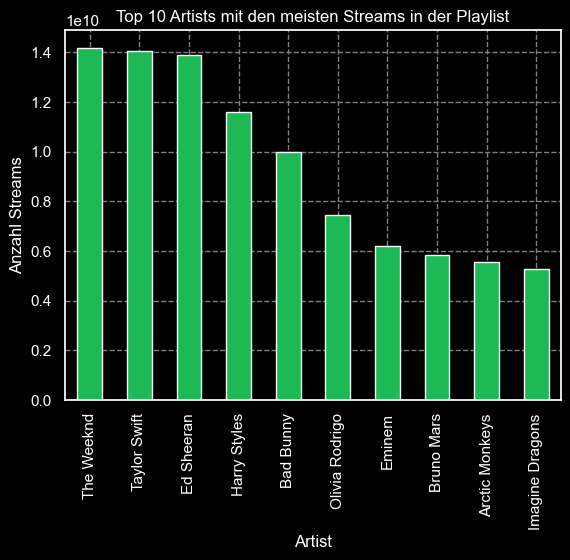

In [30]:
#Gruppierung nach Künstler, um die Summe der Streams pro Künstler zu zählen
top_artists_stream = df.groupby("artist").sum().sort_values(by='streams', ascending=False).head(10)
top_artists_stream['streams'].plot(kind='bar', title='Top 10 Artists mit den meisten Streams in der Playlist', xlabel='Artist', ylabel='Anzahl Streams')
plt.show()

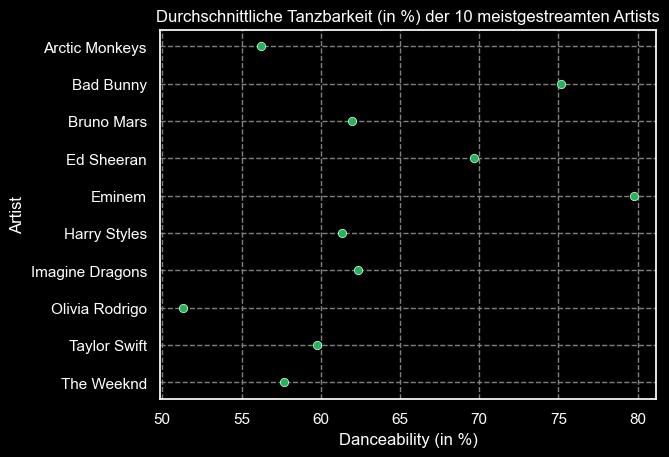

In [31]:
top_artists_danceability = df[df['artist'].isin(top_artists_stream.index)].groupby("artist").mean(numeric_only=True)
sns.scatterplot(x='danceability_%', y='artist', data=top_artists_danceability)
plt.title('Durchschnittliche Tanzbarkeit (in %) der 10 meistgestreamten Artists')
plt.xlabel('Danceability (in %)')
plt.ylabel('Artist')
plt.show()

#### 4. Wie unterscheidet sich der Anteil an gesprochenen Worten (Speechiness) zwischen älteren und neueren Songs?

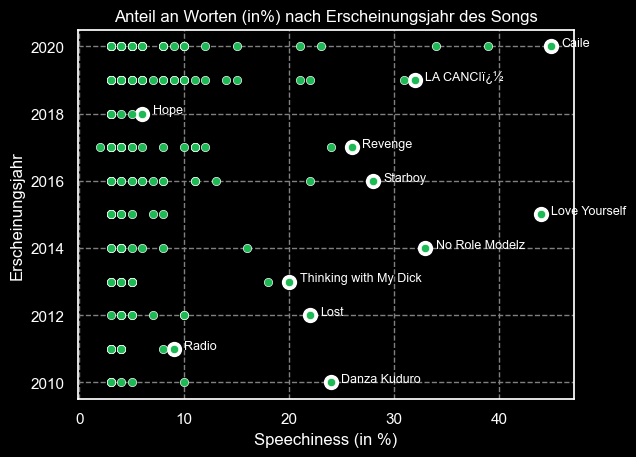

In [33]:
df_filtered = df[(df['released_year'] >= 2010) & (df['released_year'] <= 2020)]
df_max_speechness = df_filtered.loc[df_filtered.groupby('released_year')['speechiness_%'].idxmax()]
plt.scatter(df_max_speechness['speechiness_%'], df_max_speechness['released_year'], color='white', s=100)
for i in range(len(df_max_speechness)):
    plt.text(df_max_speechness['speechiness_%'].iloc[i] + 1, df_max_speechness['released_year'].iloc[i], 
             df_max_speechness['song'].iloc[i], fontsize=9, color='white')
sns.scatterplot(x='speechiness_%', y='released_year', data=df_filtered)
plt.title('Anteil an Worten (in%) nach Erscheinungsjahr des Songs')
plt.xlabel('Speechiness (in %)')
plt.ylabel('Erscheinungsjahr')
plt.show()

#### 5. Was sind die 10 Songs mit der höchsten Positivität (Valence)?

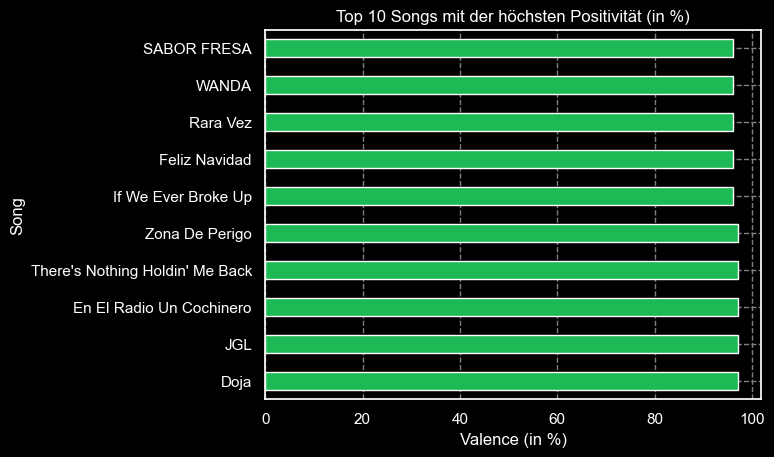

In [35]:
top_songs_valence = df[['song', 'valence_%']].sort_values(by='valence_%', ascending=False).head(10)
top_songs_valence.plot(kind='barh', x='song', y='valence_%', title='Top 10 Songs mit der höchsten Positivität (in %)', legend=False)
plt.xlabel('Valence (in %)')
plt.ylabel('Song')
plt.show()

#### 6. Wie korrelieren die Anzahl der Streams mit musikalischen Eigenschaften wie Tanzbarkeit (Danceability), Positivität (Valence), und weiteren?

In [37]:
df_corr = df[['streams','danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%']].dropna().corr()
df_corr 

,streams,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
streams,1.000000,-0.105457,-0.040831,-0.026051,-0.004485,-0.044902,-0.048337,-0.112333
danceability_%,-0.105457,1.000000,0.409873,0.198485,-0.237128,-0.089371,-0.077665,0.184393
valence_%,-0.040831,0.409873,1.000000,0.357516,-0.081161,-0.132765,0.021382,0.041874
energy_%,-0.026051,0.198485,0.357516,1.000000,-0.577318,-0.038492,0.117334,-0.004632
acousticness_%,-0.004485,-0.237128,-0.081161,-0.577318,1.000000,0.042658,-0.050230,-0.023099
instrumentalness_%,-0.044902,-0.089371,-0.132765,-0.038492,0.042658,1.000000,-0.045986,-0.083563
liveness_%,-0.048337,-0.077665,0.021382,0.117334,-0.050230,-0.045986,1.000000,-0.022598
speechiness_%,-0.112333,0.184393,0.041874,-0.004632,-0.023099,-0.083563,-0.022598,1.000000


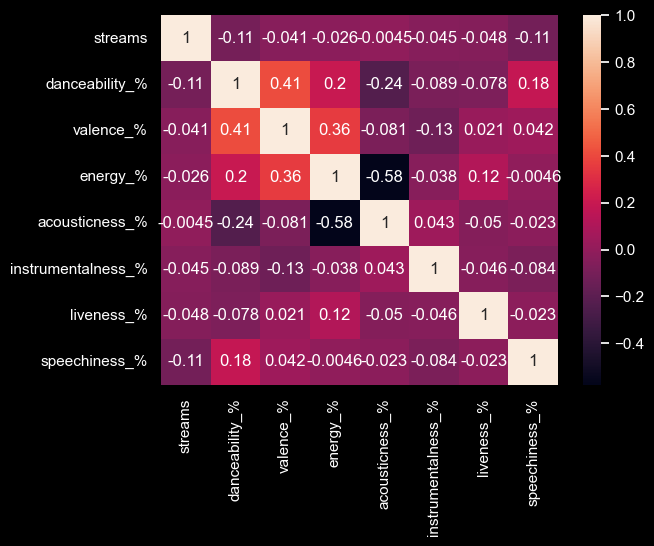

In [38]:
sns.heatmap(df_corr, annot=True)
plt.show()